In [1147]:
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load the data

In [1148]:
pd.set_option('max_columns', None) #to see all dataframe

In [1149]:
train = pd.read_csv('./data/train.csv')
train.head(2)

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   

   elimbasu5  elimbasu6  epared1  epared2  epared3  etecho1  etecho2  etecho3  \
0          0          0        0        1        0        1        0        0   
1          0          0        0        1        0        0        1        0   

   eviv1  eviv2  eviv3  dis  male  female  estadocivil1  estadocivil2  \
0      1      0      0    0     1       0             0             0   
1      0      1      0    0     1       0             0             0   

   estadocivil3  estadocivil4  estadocivil5  estadocivil6  estadocivil7  \
0             0             1             0             0             0   
1             0             1             0             0             0   

   parentesco1  parentesco2  parentesco3  parentesco4  parentesco5  \
0            1            0            0            0            0   
1            1            0            0            0            0   

   parentesco6  parentesco7  parentesco8  parentesco9  parentesco10  \
0            0            0            0            0             0   
1            0            0            0            0             0   

   parentesco11  parentesco12    idhogar  hogar_nin  hogar_adul  hogar_mayor  \
0             0             0  21eb7fcc1          0           1            0   
1             0             0  0e5d7a658          0           1            1   

   hogar_total dependency edjefe edjefa  meaneduc  instlevel1  instlevel2  \
0            1         no     10     no      10.0           0           0   
1            1          8     12     no      12.0           0           0   

   instlevel3  instlevel4  instlevel5  instlevel6  instlevel7  instlevel8  \
0           0           1           0           0           0           0   
1           0           0           0           0           0           1   

   instlevel9  bedrooms  overcrowding  tipovivi1  tipovivi2  tipovivi3  \
0           0         1           1.0          0       

In [1150]:
train.shape

(9557, 143)

In [1151]:
test = pd.read_csv('./data/test.csv')
test.head(2)

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  \
0  ID_2f6873615   NaN       0      5       0     1       1     0    NaN     1   
1  ID_1c78846d2   NaN       0      5       0     1       1     0    NaN     1   

   r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  escolari  \
0     1     2     0     1     1     1     2     3       3       3         0   
1     1     2     0     1     1     1     2     3       3       3        16   

   rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  paredmad  \
0      NaN       3            1            0          0         0         0   
1      NaN       3            1            0          0         0         0   

   paredzinc  paredfibras  paredother  pisomoscer  pisocemento  pisoother  \
0          0            0           0           1            0          0   
1          0            0           0           1            0          0   

   pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0          0            0           0          1               0          0   
1          0            0           0          1               0          0   

   techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  public  \
0          0          1                1               0            0       1   
1          0          1                1               0            0       1   

   planpri  noelec  coopele  sanitario1  sanitario2  sanitario3  sanitario5  \
0        0       0        0           0           1           0           0   
1        0       0        0           0           1           0           0   

   sanitario6  energcocinar1  energcocinar2  energcocinar3  energcocinar4  \
0           0              0              0              1              0   
1           0              0              0              1              0   

   elimbasu1  elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  \
0          1          0          0          0          0          0        0   
1          1          0          0          0          0          0        0   

   epared2  epared3  etecho1  etecho2  etecho3  eviv1  eviv2  eviv3  dis  \
0        0        1        0        0        1      0      0      1    0   
1        0        1        0        0        1      0      0      1    0   

   male  female  estadocivil1  estadocivil2  estadocivil3  estadocivil4  \
0     1       0             1             0             0             0   
1     1       0             0             0             1             0   

   estadocivil5  estadocivil6  estadocivil7  parentesco1  parentesco2  \
0             0             0             0            0            0   
1             0             0             0            0            1   

   parentesco3  parentesco4  parentesco5  parentesco6  parentesco7  \
0            1            0            0            0            0   
1            0            0            0            0            0   

   parentesco8  parentesco9  parentesco10  parentesco11  parentesco12  \
0            0            0             0             0             0   
1            0            0             0             0             0   

     idhogar  hogar_nin  hogar_adul  hogar_mayor  hogar_total dependency  \
0  72958b30c          1           2            0            3         .5   
1  72958b30c          1           2            0            3         .5   

  edjefe edjefa  meaneduc  instlevel1  instlevel2  instlevel3  instlevel4  \
0     no     17      16.5           1           0           0           0   
1     no     17      16.5           0           0           0           0   

   instlevel5  instlevel6  instlevel7  instlevel8  instlevel9  bedrooms  \
0           0           0           0           0           0         2   
1           0           0           0           1           0         2   

   overcrowding  tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5  \
0

In [1152]:
test.shape

(23856, 142)

# EDA Train

In [1153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [1154]:
# select the float columns
train_float = train.select_dtypes(include=[np.float])
train_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 8 columns):
v2a1               2697 non-null float64
v18q1              2215 non-null float64
rez_esc            1629 non-null float64
meaneduc           9552 non-null float64
overcrowding       9557 non-null float64
SQBovercrowding    9557 non-null float64
SQBdependency      9557 non-null float64
SQBmeaned          9552 non-null float64
dtypes: float64(8)
memory usage: 597.4 KB


In [1155]:
# select non-numeric columns
train_obj = train.select_dtypes(exclude=[np.number])
train_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 5 columns):
Id            9557 non-null object
idhogar       9557 non-null object
dependency    9557 non-null object
edjefe        9557 non-null object
edjefa        9557 non-null object
dtypes: object(5)
memory usage: 373.4+ KB


In [10]:
pdp.ProfileReport(train)

In [1156]:
train.shape

(9557, 143)

In [1157]:
#cleaning object or categorical variables (dependency, edjefa, edjefe)

train['dependency'].replace('yes', '1', inplace=True)
train['dependency'].replace('no', '0', inplace=True)
train['dependency'] = train['dependency'].astype(float);

train['edjefa'].replace('yes', '1', inplace=True)
train['edjefa'].replace('no', '0', inplace=True)
train['edjefa'] = train['edjefa'].apply(pd.to_numeric);

train['edjefe'].replace('yes', '1', inplace=True)
train['edjefe'].replace('no', '0', inplace=True)
train['edjefe'] = train['edjefa'].apply(pd.to_numeric);

In [1403]:
len(test['idhogar'].unique())

7352

In [1158]:
train['Target'].value_counts(normalize=True)

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64


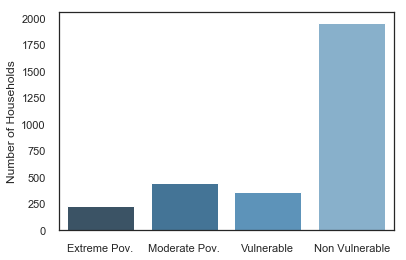

In [1159]:
#Exploring Target based on the Head of Household

train_target_head = train.loc[(train['Target'].notnull()) & (train['parentesco1'] == 1), ['Target', 'idhogar']]

train_target_head_counts = train_target_head['Target'].value_counts().sort_index()

print(train_target_head_counts)

ax=sns.countplot(x='Target', data=train_target_head, palette="Blues_d")
sns.set(font_scale=1, rc={'figure.figsize':(8, 8)}, palette="Blues_d")
plt.xticks(rotation=0)
labels = ['Extreme Pov.', 'Moderate Pov.', 'Vulnerable', 'Non Vulnerable']
ax.set_xticklabels(labels)
plt.ylabel('Number of Households')
plt.xlabel("")
plt.show()

We are dealing with an imbalanced class problem.

In [1160]:
#Verifying all idhogar have the same household target

equal_targets = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal_targets = equal_targets[equal_targets == False]
len(not_equal_targets)

85

There are 85 idhogar that do not have a unique target value.  This means that some individual members of the household have a different target than the head of the household.  

Since the competition clarifies that the target of the head of the household (identifiable through parentesco1=1), I will avoid this missclasification for now.  However, in a real world situation I would have to understand better the reason for this missclasification in order to make a decision on how to fix it.

In [1161]:
#Heads of Households
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]
households_leader.value_counts()

1    2973
0      15
Name: parentesco1, dtype: int64

In [1162]:
households_leader_equal_target = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
households_leader_not_equal_targets = households_leader_equal_target[households_leader_equal_target == False]
len(households_leader_not_equal_targets)

0

There are 15 households without a household leader.  From these 15 households, zero has different labels among the individual members of the household.

In [1163]:
#columns with null values
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [1164]:
#v2a1 = rent null values
#Setting v2a1 (rent) to zero for those households that have tipovivi1 = 1 (own and fully paid house)
train.loc[train['v2a1'].isnull() & train['tipovivi1'] == 1, 'v2a1'] = 0

In [1165]:
train[null_columns].isnull().sum()

v2a1          949
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [1166]:
print((train.loc[train['v2a1'].isnull() & train['Target'] == 1]).shape)
print((train.loc[train['v2a1'].isnull() & train['Target'] == 2]).shape)
print((train.loc[train['v2a1'].isnull() & train['Target'] == 3]).shape)
print((train.loc[train['v2a1'].isnull() & train['Target'] == 4]).shape)

(268, 143)
(0, 143)
(0, 143)
(0, 143)


In [1167]:
#Mean values of rent for households from different categories to input null values
v2a1_1 = train.query('Target == 1 & v2a1 != "NaN"')['v2a1'].mean()
v2a1_2 = train.query('Target == 2 & v2a1 != "NaN"')['v2a1'].mean()
v2a1_3 = train.query('Target == 3 & v2a1 != "NaN"')['v2a1'].mean()
v2a1_4 = train.query('Target == 4 & v2a1 != "NaN"')['v2a1'].mean()
print(v2a1_1)
print(v2a1_2)
print(v2a1_3)
print(v2a1_4)

20793.89262820513
24693.437311178248
28717.75
66065.62562634217


In [1168]:
train.loc[train['v2a1'].isnull() & (train['Target']== 1), 'v2a1'] = v2a1_1
train.loc[train['v2a1'].isnull() & (train['Target']== 2), 'v2a1'] = v2a1_2
train.loc[train['v2a1'].isnull() & (train['Target']== 3), 'v2a1'] = v2a1_3
train.loc[train['v2a1'].isnull() & (train['Target']== 4), 'v2a1'] = v2a1_4

In [1169]:
train[null_columns].isnull().sum()

v2a1            0
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [1170]:
#v18q1 = number of tablets household owns
train['v18q'].value_counts()


0    7342
1    2215
Name: v18q, dtype: int64

In [1171]:
train['v18q1'].value_counts()

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [1172]:
# Copy of heads of households
heads_train = train.loc[train['parentesco1'] == 1].copy()

In [1173]:
# v18q1 by heads of household
heads_train.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

In [1174]:
# Every family that has nan for v18q1 does not own a tablet. 
# We can fill in this missing value with zero.
train['v18q1'] = train['v18q1'].fillna(0)

In [1175]:
#rez_esc = Years behind in school
#If person is between 7 and 19 years old and missing rez_esc, then set it to zero
train.loc[(train['age']<=19) & (train['rez_esc'].isnull()), 'rez_esc'] = 0
train.loc[(train['age']>=7) & (train['rez_esc'].isnull()), 'rez_esc'] = 0

In [1176]:
#meaneduc
train[train['SQBmeaned'].isnull()] [['Id','idhogar','edjefe','edjefa', 'hogar_adul', 'hogar_mayor', 'hogar_nin', 'hogar_total', 'parentesco1', 'age', 'escolari',"meaneduc", 'SQBmeaned']]

Id    idhogar  edjefe  edjefa  hogar_adul  hogar_mayor  \
1291  ID_bd8e11b0f  1b31fd159      10      10           0            0   
1840  ID_46ff87316  a874b7ce7       0       0           0            0   
1841  ID_69f50bf3e  a874b7ce7       0       0           0            0   
2049  ID_db3168f9f  faaebf71a       0       0           0            0   
2050  ID_2a7615902  faaebf71a       0       0           0            0   

      hogar_nin  hogar_total  parentesco1  age  escolari  meaneduc  SQBmeaned  
1291          1            1            1   18        10       NaN        NaN  
1840          2            2            0   18         6       NaN        NaN  
1841          2            2            1   18         4       NaN        NaN  
2049          2            2            1   19        12       NaN        NaN  
2050          2            2            0   19        12       NaN        NaN

In [1177]:
#all individuals leaving in this households are adults, therefore meaneduc = their escolari
train.loc[train.meaneduc.isnull(), 'meaneduc'] = train.escolari 

In [1178]:
#Calculating SQBmeaned (which is escolari squared) for null values
train.loc[train.SQBmeaned.isnull(), 'SQBmeaned'] = np.square(train.escolari)

In [1179]:
train[null_columns].isnull().sum()

v2a1         0
v18q1        0
rez_esc      0
meaneduc     0
SQBmeaned    0
dtype: int64

In [1400]:
train.shape

(9557, 149)

# EDA Test

In [1180]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [1181]:
# select the float columns
test_float = test.select_dtypes(include=[np.float])
test_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 8 columns):
v2a1               6453 non-null float64
v18q1              5730 non-null float64
rez_esc            4203 non-null float64
meaneduc           23825 non-null float64
overcrowding       23856 non-null float64
SQBovercrowding    23856 non-null float64
SQBdependency      23856 non-null float64
SQBmeaned          23825 non-null float64
dtypes: float64(8)
memory usage: 1.5 MB


In [1182]:
# select non-numeric columns
test_obj = test.select_dtypes(exclude=[np.number])
test_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 5 columns):
Id            23856 non-null object
idhogar       23856 non-null object
dependency    23856 non-null object
edjefe        23856 non-null object
edjefa        23856 non-null object
dtypes: object(5)
memory usage: 932.0+ KB


In [223]:
pdp.ProfileReport(test)

In [1183]:
test.shape

(23856, 142)

In [1184]:
#cleaning object or categorical variables (dependency, edjefa, edjefe)

test['dependency'].replace('yes', '1', inplace=True)
test['dependency'].replace('no', '0', inplace=True)
test['dependency']= test['dependency'].astype(float);

test['edjefa'].replace('yes', '1', inplace=True)
test['edjefa'].replace('no', '0', inplace=True)
test['edjefa'] = test['edjefa'].apply(pd.to_numeric);

test['edjefe'].replace('yes', '1', inplace=True)
test['edjefe'].replace('no', '0', inplace=True)
test['edjefe'] = test['edjefe'].apply(pd.to_numeric);

In [1185]:
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [1186]:
#v2a1

#Setting v2a1 (rent) to zero for those households that have tipovivi1 = 1 (own and fully paid house)
test.loc[test['v2a1'].isnull() & test['tipovivi1'] == 1, 'v2a1'] = 0

In [1187]:
test[null_columns].isnull().sum()

v2a1          2470
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [1188]:
#since we cannot check target value, I will use the average rent 
#on training rents to replace the rest of null values on rent
test.loc[test['v2a1'].isnull(), 'v2a1'] = (v2a1_1+v2a1_2+v2a1_3+v2a1_4)/4

In [1189]:
test[null_columns].isnull().sum()

v2a1             0
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [1190]:
# Copy of heads of households in test
heads_test = test.loc[test['parentesco1'] == 1].copy()

In [1191]:
# v18q1 by heads of household
heads_test.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    5726
1       0
Name: v18q1, dtype: int64

In [1192]:
# Every family that has nan for v18q1 does not own a tablet. 
# We can fill in this missing value with zero.
test['v18q1'] = test['v18q1'].fillna(0)

In [1193]:
#rez_esc = Years behind in school
#If person is between 7 and 19 years old and missing rez_esc, then set it to zero
test.loc[(test['age']<=19) & (test['rez_esc'].isnull()), 'rez_esc'] = 0
test.loc[(test['age']>=7) & (test['rez_esc'].isnull()), 'rez_esc'] = 0

In [1194]:
test[null_columns].isnull().sum()

v2a1          0
v18q1         0
rez_esc       0
meaneduc     31
SQBmeaned    31
dtype: int64

In [1195]:
#all individuals leaving in this households are adults, therefore meaneduc = their escolari
test.loc[test.meaneduc.isnull(), 'meaneduc'] = test.escolari 

#Calculating SQBmeaned (which is escolari squared) for null values
test.loc[test.SQBmeaned.isnull(), 'SQBmeaned'] = np.square(test.escolari)

test[null_columns].isnull().sum()

v2a1         0
v18q1        0
rez_esc      0
meaneduc     0
SQBmeaned    0
dtype: int64

# Graphs describing households (aggregated)

In [1196]:
len(train.Id)

9557

In [1197]:
len(train.idhogar.unique())

2988

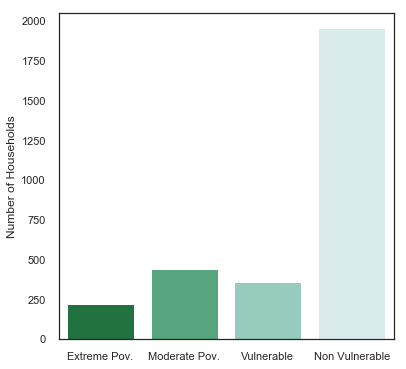

In [1198]:
#Exploring Target based on the Head of Household

train_target_head = train.loc[(train['Target'].notnull()) & (train['parentesco1'] == 1), ['Target', 'idhogar']]

#train_target_head_counts = train_target_head['Target'].value_counts().sort_index()
sns.set(font_scale=1, rc={'figure.figsize':(6, 6)}, palette="BuGn_r")
sns.set_style("white")
ax=sns.countplot(x='Target', data=train_target_head, palette="BuGn_r")
plt.xticks(rotation=0)
labels = ['Extreme Pov.', 'Moderate Pov.', 'Vulnerable', 'Non Vulnerable']
ax.set_xticklabels(labels)
plt.ylabel('Number of Households')
plt.xlabel("")
plt.show()

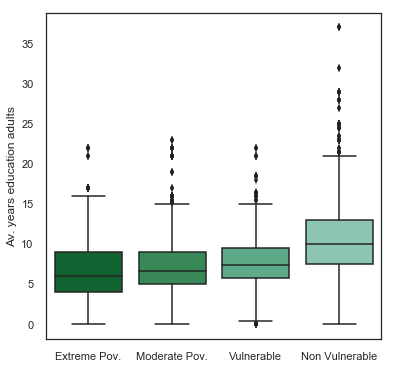

In [1381]:
#Meaneduc by poverty level
sns.set(font_scale=1, rc={'figure.figsize':(6, 6)}, palette="BuGn_r")
sns.set_style("white")
fig, (ax1) = plt.subplots(1);
ax1=sns.boxplot(x='Target', y='meaneduc', data=train, ax=ax1);
ax1.set_xlabel('');
ax1.set_ylabel('Av. years education adults');
labels = ['Extreme Pov.', 'Moderate Pov.', 'Vulnerable', 'Non Vulnerable']
ax1.set_xticklabels(labels);

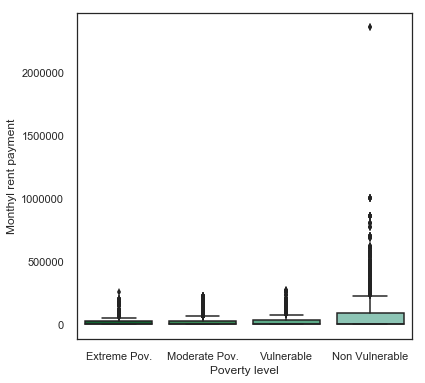

In [1199]:
#Rent by poverty level
sns.set(font_scale=1, rc={'figure.figsize':(6, 6)}, palette="BuGn_r")
sns.set_style("white")
fig, (ax1) = plt.subplots(1);
ax1=sns.boxplot(x='Target', y='v2a1', data=train, ax=ax1);
ax1.set_xlabel('Poverty level');
ax1.set_ylabel('Monthyl rent payment');
labels = ['Extreme Pov.', 'Moderate Pov.', 'Vulnerable', 'Non Vulnerable']
ax1.set_xticklabels(labels);

In [1200]:
#Household by type 
my_df=train[['tipovivi1', 'tipovivi3', 'tipovivi2','tipovivi5','tipovivi4', 'idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

In [1201]:
housing_types=[]
for col in ['tipovivi1', 'tipovivi3', 'tipovivi2','tipovivi5','tipovivi4']:
    housing_types.append(my_df[col].sum())

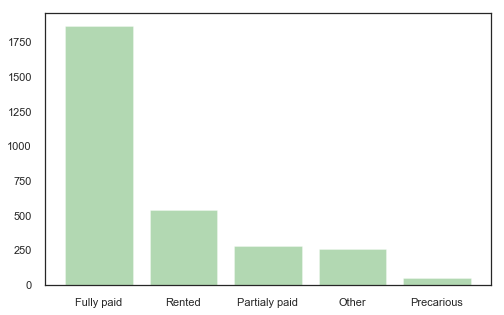

In [1387]:
plt.figure(figsize=(8,5));
plt.bar(['tipovivi1', 'tipovivi3', 'tipovivi2', 'tipovivi5', 'tipovivi4'], housing_types, color='g', alpha=.3)
#plt.imshow(cmap=plt.get_cmap('BuGn'))
plt.xticks(['tipovivi1', 'tipovivi3', 'tipovivi2', 'tipovivi5', 'tipovivi4'], ['Fully paid', 'Rented', 'Partialy paid', 'Other', 'Precarious']);

In [1426]:
# People by gender in household
my_df=train[['male', 'female', 'Id']].sort_values(['Id'], axis=0, ascending=True).groupby(['Id']).mean()

In [1422]:
train['female'].value_counts()

1    4937
0    4620
Name: female, dtype: int64

In [1427]:
house_gender=[]
for col in ['male', 'female']:
    house_gender.append(my_df[col].sum())

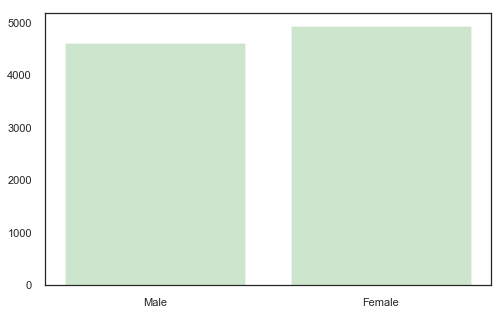

In [1428]:
plt.figure(figsize=(8,5));
plt.bar(['male', 'female'], house_gender, color='g', alpha=.2)
plt.xticks(['male', 'female'], ['Male', 'Female']);

In [1206]:
#predominant materials of outside wall household
my_df=train[['paredblolad', 'paredpreb', 'paredmad','paredzocalo', 'paredzinc', 'pareddes', 'paredfibras', 'paredother','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

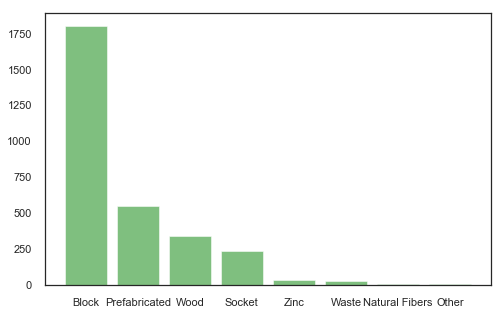

In [1207]:
house_materials=[]
for col in ['paredblolad', 'paredpreb', 'paredmad','paredzocalo', 'paredzinc', 'pareddes', 'paredfibras', 'paredother']:
    house_materials.append(my_df[col].sum())

plt.figure(figsize=(8,5));    
plt.bar(['paredblolad', 'paredpreb', 'paredmad','paredzocalo', 'paredzinc', 'pareddes', 'paredfibras', 'paredother'], house_materials, color='g', alpha=.5)
plt.xticks(['paredblolad', 'paredpreb', 'paredmad','paredzocalo', 'paredzinc', 'pareddes', 'paredfibras', 'paredother'], ['Block', 'Prefabricated', 'Wood', 'Socket', 'Zinc','Waste','Natural Fibers', 'Other']);

In [1208]:
#predominant materials of floor household
my_df=train[['pisomoscer', 'pisocemento', 'pisomadera', 'pisonotiene','pisoother', 'pisonatur','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

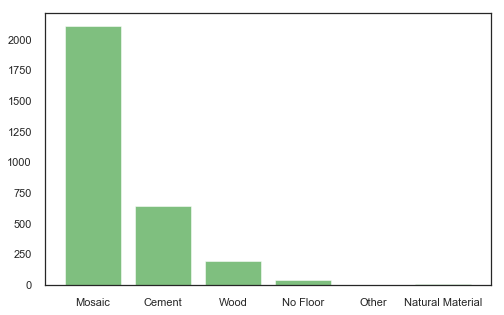

In [1209]:
house_floor=[]
for col in ['pisomoscer', 'pisocemento', 'pisomadera', 'pisonotiene','pisoother', 'pisonatur']:
    house_floor.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['pisomoscer', 'pisocemento', 'pisomadera', 'pisonotiene','pisoother', 'pisonatur'], house_floor, color='g', alpha=.5)
plt.xticks(['pisomoscer', 'pisocemento', 'pisomadera', 'pisonotiene','pisoother', 'pisonatur'], ['Mosaic', 'Cement', 'Wood', 'No Floor', 'Other', 'Natural Material']);

In [1210]:
# Household by type roof
my_df=train[['techozinc', 'techoentrepiso', 'techocane', 'techootro','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

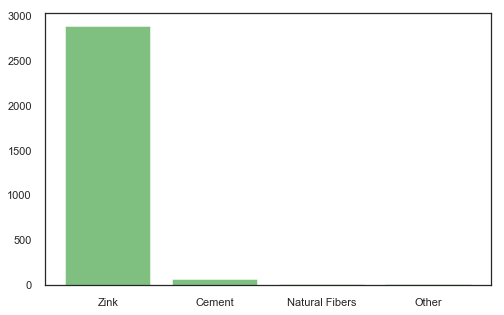

In [1211]:
house_roof=[]
for col in ['techozinc', 'techoentrepiso', 'techocane', 'techootro']:
    house_roof.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['techozinc', 'techoentrepiso', 'techocane', 'techootro'], house_roof, color='g', alpha=.5)
plt.xticks(['techozinc', 'techoentrepiso', 'techocane', 'techootro'], ['Zink', 'Cement', 'Natural Fibers', 'Other']);

In [1212]:
# Household dwelling
my_df=train[['abastaguadentro', 'abastaguafuera', 'abastaguano', 'idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

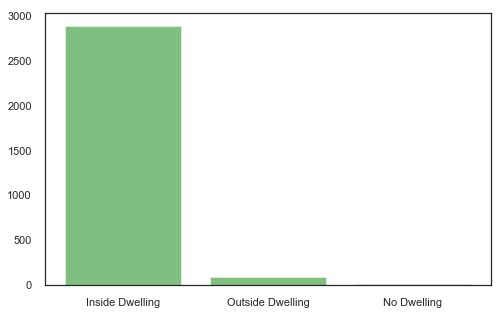

In [1213]:
house_dwell=[]
for col in ['abastaguadentro', 'abastaguafuera', 'abastaguano']:
    house_dwell.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['abastaguadentro', 'abastaguafuera', 'abastaguano'], house_dwell, color='g', alpha=.5)
plt.xticks(['abastaguadentro', 'abastaguafuera', 'abastaguano'], ['Inside Dwelling', 'Outside Dwelling', 'No Dwelling']);

In [1214]:
#Electricity sources by household
my_df=train[['public', 'coopele','planpri', 'noelec', 'idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

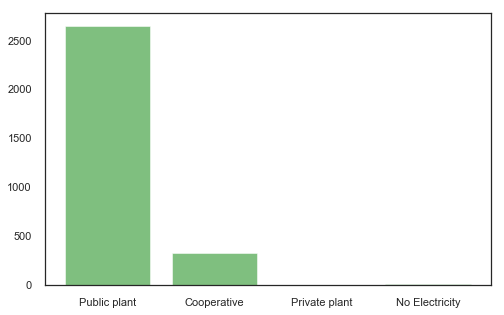

In [1215]:
house_elec=[]
for col in ['public', 'coopele','planpri', 'noelec']:
    house_elec.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['public', 'coopele','planpri', 'noelec'], house_elec, color='g', alpha=.5)
plt.xticks(['public', 'coopele','planpri', 'noelec'], ['Public plant', 'Cooperative','Private plant', 'No Electricity']);

In [1216]:
#Toilet connections by household
my_df=train[['sanitario3', 'sanitario2','sanitario5', 'sanitario1', 'sanitario6', 'idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

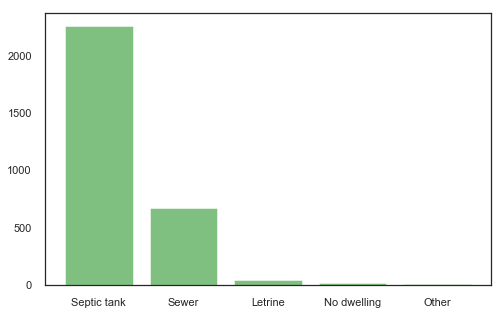

In [1217]:
house_toilet=[]
for col in ['sanitario3', 'sanitario2','sanitario5', 'sanitario1', 'sanitario6']:
    house_toilet.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['sanitario3', 'sanitario2','sanitario5', 'sanitario1', 'sanitario6'], house_toilet, color='g', alpha=.5)
plt.xticks(['sanitario3', 'sanitario2','sanitario5', 'sanitario1', 'sanitario6'], ['Septic tank', 'Sewer', 'Letrine', 'No dwelling', 'Other']);

In [1218]:
#Cooking source
my_df=train[['energcocinar2','energcocinar3', 'energcocinar4', 'energcocinar1', 'idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

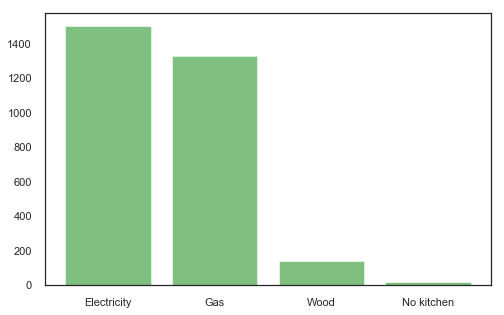

In [1219]:
house_cook=[]
for col in [ 'energcocinar2','energcocinar3', 'energcocinar4','energcocinar1']:
    house_cook.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar([ 'energcocinar2','energcocinar3', 'energcocinar4','energcocinar1'], house_cook, color='g', alpha=.5)
plt.xticks(['energcocinar2','energcocinar3', 'energcocinar4','energcocinar1'], ['Electricity', 'Gas', 'Wood', 'No kitchen']);

In [1220]:
#rubbish disposal
my_df=train[['elimbasu1','elimbasu3', 'elimbasu2', 'elimbasu4', 'elimbasu6', 'elimbasu5', 'idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

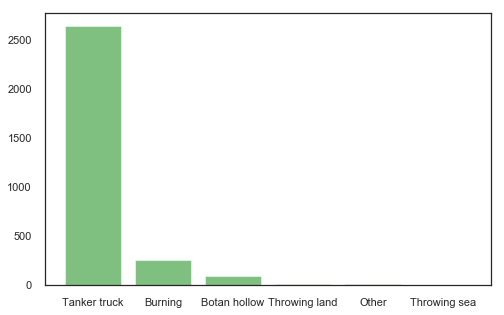

In [1221]:
house_rubbish=[]
for col in ['elimbasu1','elimbasu3', 'elimbasu2', 'elimbasu4', 'elimbasu6', 'elimbasu5']:
    house_rubbish.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['elimbasu1','elimbasu3', 'elimbasu2', 'elimbasu4', 'elimbasu6', 'elimbasu5'], house_rubbish, color='g', alpha=.5)
plt.xticks(['elimbasu1','elimbasu3', 'elimbasu2', 'elimbasu4', 'elimbasu6', 'elimbasu5'], ['Tanker truck', 'Burning','Botan hollow','Throwing land','Other', 'Throwing sea']);

In [1222]:
#Quality of walls
my_df=train[['epared1', 'epared2', 'epared3','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

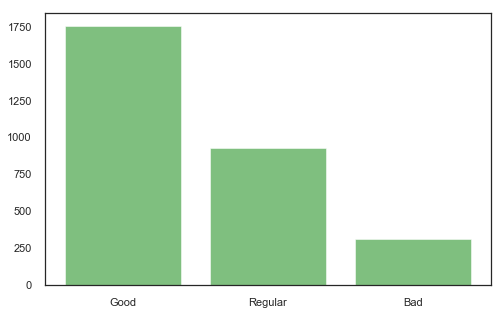

In [1223]:
house_walls=[]
for col in ['epared3', 'epared2', 'epared1']:
    house_walls.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['epared3', 'epared2', 'epared1'], house_walls, color='g', alpha=.5)
plt.xticks(['epared3', 'epared2', 'epared1'], ['Good', 'Regular', 'Bad']);

In [1224]:
#Quality of roof
my_df=train[['etecho1', 'etecho2', 'etecho3','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

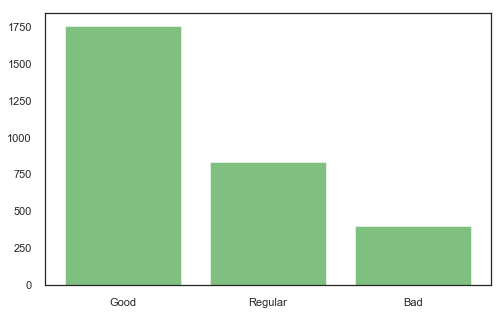

In [1225]:
house_roof=[]
for col in ['etecho3', 'etecho2', 'etecho1']:
    house_roof.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['etecho3', 'etecho2', 'etecho1'], house_roof, color='g', alpha=.5)
plt.xticks(['etecho3', 'etecho2', 'etecho1'], ['Good', 'Regular', 'Bad']);

In [1226]:
#Quality of floor
my_df=train[['eviv3', 'eviv2', 'eviv1','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

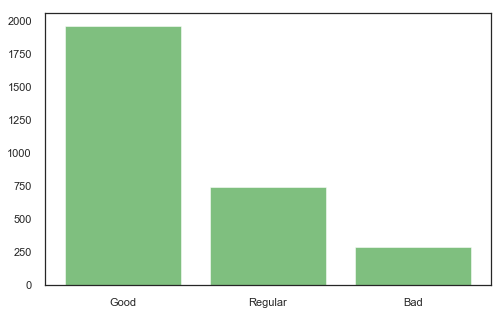

In [1227]:
house_floorq=[]
for col in ['eviv3', 'eviv2', 'eviv1']:
    house_floorq.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['eviv3', 'eviv2', 'eviv1'], house_floorq, color='g', alpha=.5)
plt.xticks(['eviv3', 'eviv2', 'eviv1'], ['Good', 'Regular', 'Bad']);

In [1228]:
#Zone of household
my_df=train[['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

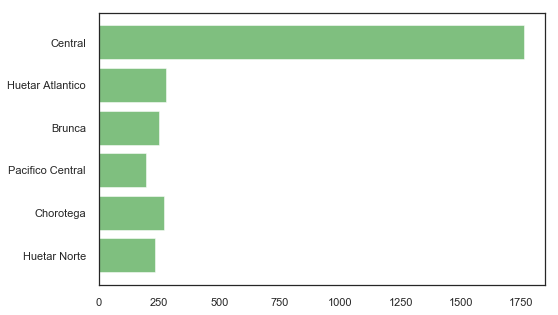

In [1229]:
house_zone=[]
for col in ['lugar6', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar1']:
    house_zone.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.barh(['lugar6', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar1'], house_zone, color='g', alpha=.5)
plt.yticks(['lugar6', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar1'], ['Huetar Norte', 'Chorotega', 'Pacifico Central', 'Brunca', 'Huetar Atlantico', 'Central' ]);

In [1230]:
# Area
my_df=train[['area1', 'area2','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

[2128, 860]


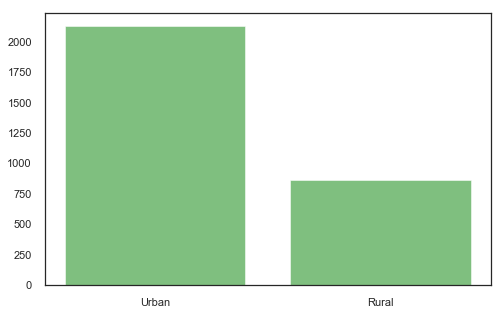

In [1231]:
house_area=[]
for col in ['area1', 'area2']:
    house_area.append(my_df[col].sum())

print(house_area)

plt.figure(figsize=(8,5));
plt.bar(['area1', 'area2'], house_area, color='g', alpha=.5)
plt.xticks(['area1', 'area2'], ['Urban', 'Rural' ]);

In [1232]:
#devices
my_df=train[['computer', 'television', 'mobilephone','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

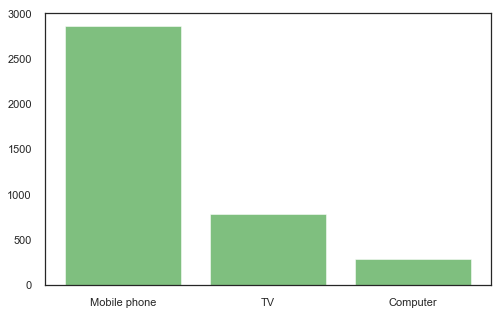

In [1233]:
devices=[]
for col in ['mobilephone', 'television', 'computer']:
    devices.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['mobilephone', 'television', 'computer'], devices, color='g', alpha=.5)
plt.xticks(['mobilephone', 'television', 'computer'], [ 'Mobile phone', 'TV','Computer']);


## Graphs describing population in households

In [1234]:
#Civil Status
my_df=train[['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7','Id']].sort_values(['Id'], axis=0, ascending=True).groupby(['Id']).mean()

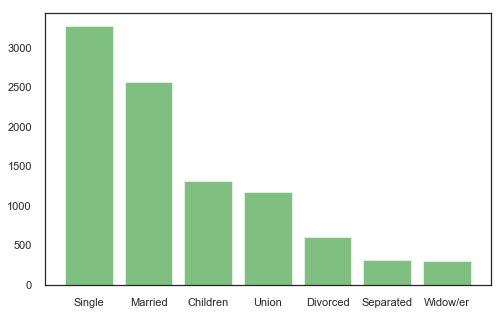

In [1235]:
civil_status=[]
for col in ['estadocivil7','estadocivil3','estadocivil1', 'estadocivil2', 'estadocivil5', 'estadocivil6', 'estadocivil4']:
    civil_status.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['estadocivil7', 'estadocivil3', 'estadocivil1', 'estadocivil2', 'estadocivil5', 'estadocivil6', 'estadocivil4'], civil_status, color='g', alpha=.5)
plt.xticks(['estadocivil7','estadocivil3','estadocivil1', 'estadocivil2', 'estadocivil5', 'estadocivil6', 'estadocivil4'], ['Single', 'Married','Children', 'Union',  'Divorced', 'Separated', 'Widow/er']);

In [1410]:
#Rol in household
my_df=train[['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12','Id']].sort_values(['Id'], axis=0, ascending=True).groupby(['Id']).mean()

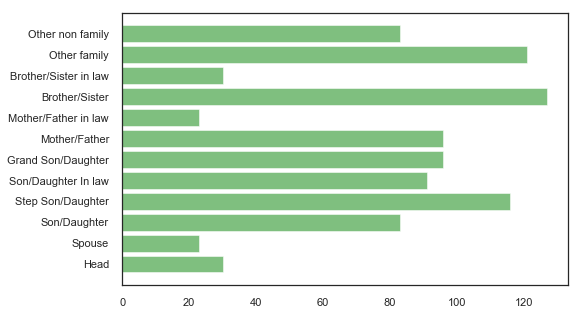

In [1411]:
id_rol=[]
for col in ['parentesco10', 'parentesco8', 'parentesco12', 'parentesco4', 'parentesco5', 'parentesco7', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12']:
    id_rol.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.barh(['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12'], id_rol, color='g', alpha=.5)
plt.yticks(['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12'], ['Head', 'Spouse', 'Son/Daughter', 'Step Son/Daughter', 'Son/Daughter In law', 'Grand Son/Daughter', 'Mother/Father', 'Mother/Father in law', 'Brother/Sister', 'Brother/Sister in law', 'Other family', 'Other non family']);


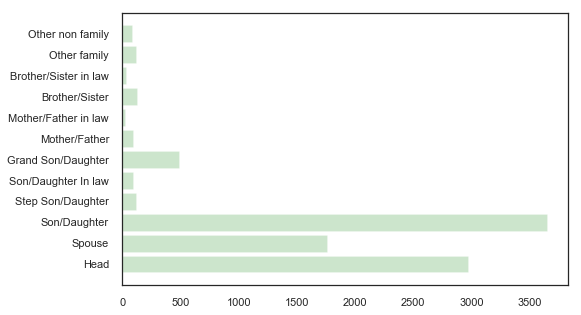

In [1416]:
id_rol=[]
for col in ['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12']:
    id_rol.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.barh(['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12'], id_rol, color='g', alpha=.2)
plt.yticks(['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12'], ['Head', 'Spouse', 'Son/Daughter', 'Step Son/Daughter', 'Son/Daughter In law', 'Grand Son/Daughter', 'Mother/Father', 'Mother/Father in law', 'Brother/Sister', 'Brother/Sister in law', 'Other family', 'Other non family']);


In [1239]:
#Distribution of individuals by age in the household
my_df=train[['hogar_nin', 'hogar_adul', 'hogar_mayor','idhogar']].sort_values(['idhogar'], axis=0, ascending=True).groupby(['idhogar']).mean()

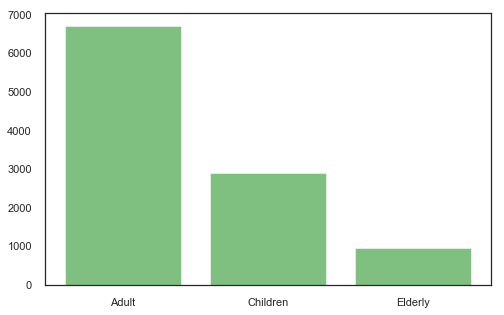

In [1240]:
age_hous=[]
for col in ['hogar_adul','hogar_nin', 'hogar_mayor']:
    age_hous.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.bar(['hogar_adul','hogar_nin', 'hogar_mayor'], age_hous, color='g', alpha=.5)
plt.xticks(['hogar_adul','hogar_nin', 'hogar_mayor'], [ 'Adult', 'Children','Elderly']);


In [1241]:
#Education level of individuals in household
my_df=train[['instlevel1', 'instlevel2', 'instlevel3','instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9','Id']].sort_values(['Id'], axis=0, ascending=True).groupby(['Id']).mean()

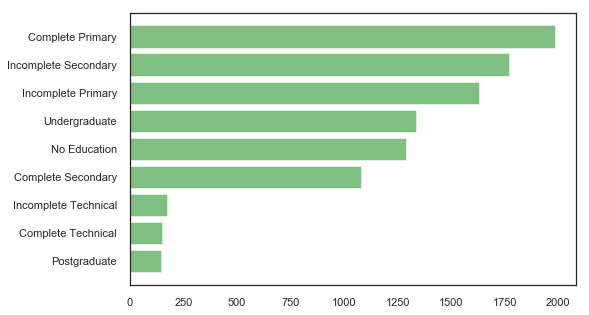

In [1242]:
education=[]
for col in ['instlevel9', 'instlevel7', 'instlevel6','instlevel5', 'instlevel1', 'instlevel8', 'instlevel2', 'instlevel4', 'instlevel3']:
    education.append(my_df[col].sum())

plt.figure(figsize=(8,5));
plt.barh(['instlevel9', 'instlevel7', 'instlevel6','instlevel5', 'instlevel1', 'instlevel8', 'instlevel2', 'instlevel4', 'instlevel3'], education, color='g', alpha=.5)
plt.yticks(['instlevel9', 'instlevel7', 'instlevel6','instlevel5', 'instlevel1', 'instlevel8', 'instlevel2', 'instlevel4', 'instlevel3'], ['Postgraduate', 'Complete Technical', 'Incomplete Technical', 'Complete Secondary', 'No Education', 'Undergraduate', 'Incomplete Primary', 'Incomplete Secondary', 'Complete Primary']);

# Graphs by Poverty Level

In [1243]:
#Electricity by Poverty Level
elec = []

# Assign values
for i, row in train.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
train['elec'] = elec
train['elec'].astype('category', inplace=True)
train['elec'][:5]

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: elec, dtype: float64

In [1244]:
train.elec.value_counts()

2.0    8459
1.0    1059
0.0      21
3.0       3
Name: elec, dtype: int64

In [1245]:
train.planpri.value_counts()

0    9554
1       3
Name: planpri, dtype: int64

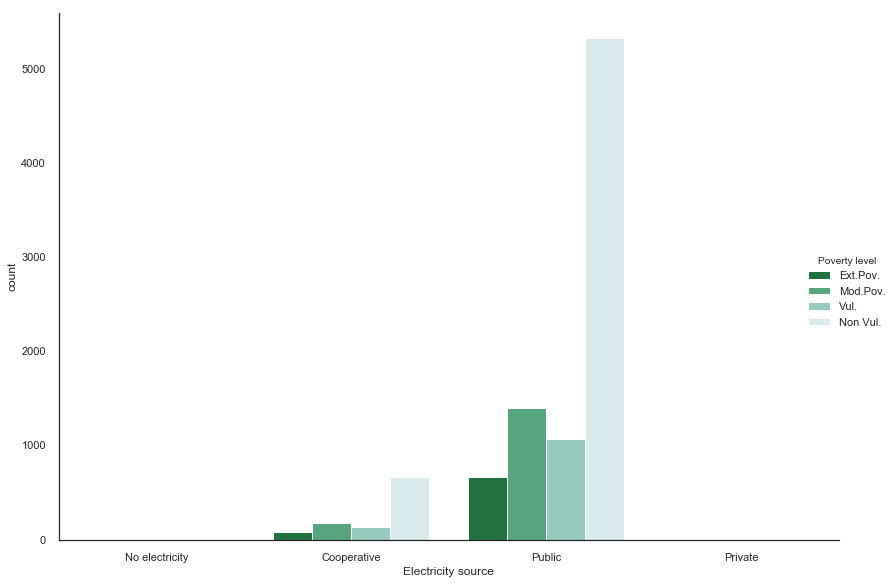

In [1246]:
sns.set_style("white")
ax=sns.catplot(x="elec", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, height=8.27, aspect=11.7/8.27);
ax.set_xlabels('Electricity source')
labels = ['No electricity', 'Cooperative', 'Public', 'Private']
ax.set_xticklabels(labels);
legend = ax._legend
legend.set_title("Poverty level")
for t, l in zip(legend.texts,('Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.')):
    t.set_text(l)

In [1247]:
#Area by Poverty Level
area = []

# Assign values
for i, row in train.iterrows():
    if row['area1'] == 1:
        area.append(0)
    elif row['area2'] == 1:
        area.append(1)
    else:
        area.append(np.nan)
        
# Record the new variable and missing flag
train['area'] = area
train['area'].astype('category', inplace=True)
train['area'][:5]

0    0
1    0
2    0
3    0
4    0
Name: area, dtype: int64

In [1248]:
train.area.value_counts()

0    6829
1    2728
Name: area, dtype: int64

<Figure size 720x720 with 0 Axes>

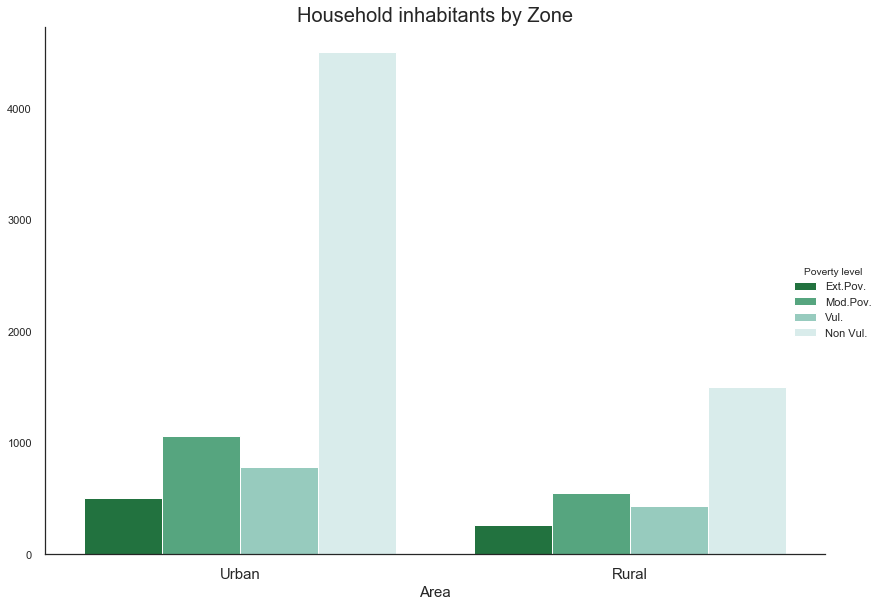

In [1249]:
plt.figure(figsize = (10,10))
sns.set_style("white")
ax=sns.catplot(x="area", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, height=8.27, aspect=11.7/8.27);
plt.title('Household inhabitants by Zone', fontsize=20)
ax.set_xlabels('Area', fontsize=15)
ax.set_ylabels('')
labels = ['Urban', 'Rural']
ax.set_xticklabels(labels, fontsize=15);
legend = ax._legend
legend.set_title("Poverty level")
for t, l in zip(legend.texts,('Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.')):
    t.set_text(l)

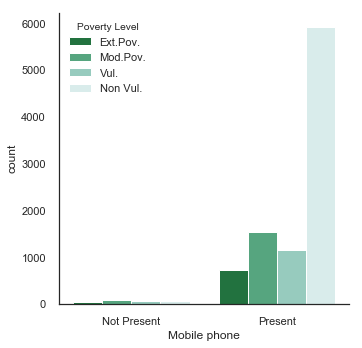

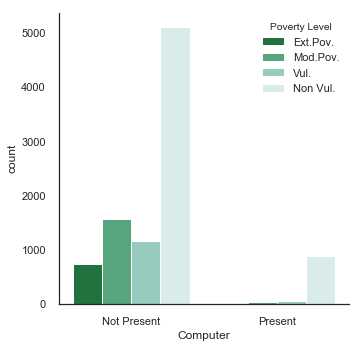

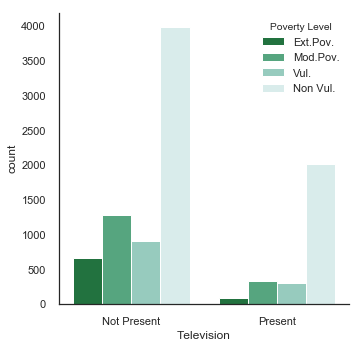

In [1250]:
#figure, ax=plt.subplots(nrows=1, ncols=3, figsize=(5,5)
ax1=sns.catplot(x="mobilephone", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, legend_out=False);
ax1.set_xlabels('Mobile phone')
labels = ['Not Present', 'Present']
ax1.set_xticklabels(labels);
leg = ax1.axes.flat[0].get_legend()
new_title = 'Poverty Level'
leg.set_title(new_title)
new_labels = ['Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.']
for t, l in zip(leg.texts, new_labels): t.set_text(l)


ax2=sns.catplot(x="computer", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, legend_out=False);
ax2.set_xlabels('Computer')
labels = ['Not Present', 'Present']
ax2.set_xticklabels(labels);
leg = ax2.axes.flat[0].get_legend()
new_title = 'Poverty Level'
leg.set_title(new_title)
new_labels = ['Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

ax3= sns.catplot(x="television", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, legend_out=False);
ax3.set_xlabels('Television')
labels = ['Not Present', 'Present']
ax3.set_xticklabels(labels);
leg = ax3.axes.flat[0].get_legend()
new_title = 'Poverty Level'
leg.set_title(new_title)
new_labels = ['Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

                    

In [1405]:
train.television.value_counts()

0    6837
1    2720
Name: television, dtype: int64

In [1251]:
#Quality of House by Poverty Level
#Walls
pared=[]

# Assign values
for i, row in train.iterrows():
    if row['epared1'] == 1:
        pared.append(0)
    elif row['epared2'] == 1:
        pared.append(1)
    elif row['epared3'] == 1:
        pared.append(2)
    else:
        pared.append(np.nan)
        
# Record the new variable and missing flag
train['pared'] = pared
train['pared'].astype('category', inplace=True)
train['pared'][:5]



0    1
1    1
2    1
3    2
4    2
Name: pared, dtype: int64

In [1252]:
train.pared.value_counts()

2    5449
1    3129
0     979
Name: pared, dtype: int64

In [1253]:
train.epared2.value_counts()

0    6428
1    3129
Name: epared2, dtype: int64

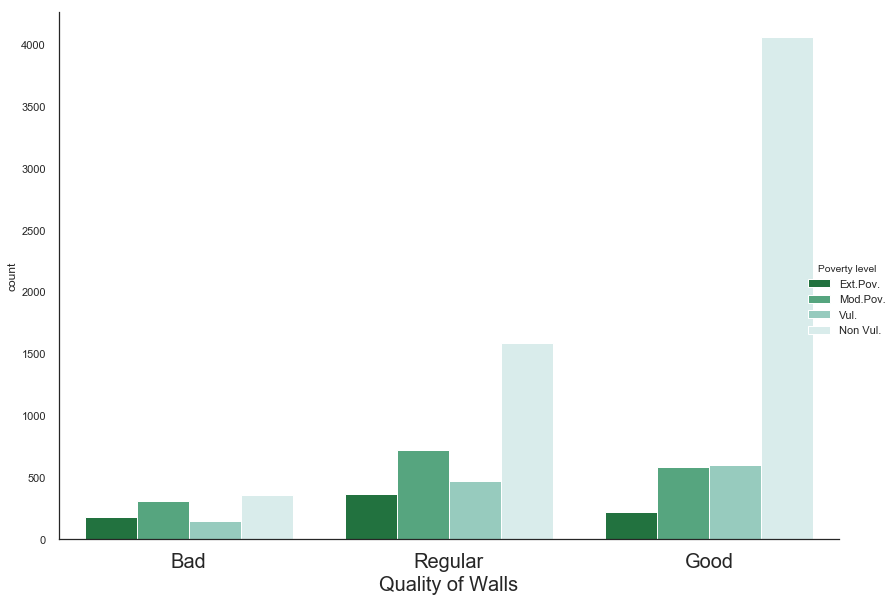

In [1254]:
sns.set_style("white")
ax=sns.catplot(x="pared", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, height=8.27, aspect=11.7/8.27);
ax.set_xlabels('Quality of Walls', fontsize=20 )
labels = ['Bad', 'Regular', 'Good']
ax.set_xticklabels(labels, fontsize=20);
legend = ax._legend
legend.set_title("Poverty level")
for t, l in zip(legend.texts,('Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.')):
    t.set_text(l)

In [1255]:
#Quality of House by Poverty Level
#Techo
techo=[]

# Assign values
for i, row in train.iterrows():
    if row['etecho1'] == 1:
        techo.append(0)
    elif row['etecho2'] == 1:
        techo.append(1)
    elif row['etecho3'] == 1:
        techo.append(2)
    else:
        techo.append(np.nan)
        
# Record the new variable and missing flag
train['techo'] = techo
train['techo'].astype('category', inplace=True)
train['techo'][:5]



0    0
1    1
2    2
3    2
4    2
Name: techo, dtype: int64

In [1256]:
train.techo.value_counts()

2    5577
1    2753
0    1227
Name: techo, dtype: int64

In [1257]:
train.etecho3.value_counts()

1    5577
0    3980
Name: etecho3, dtype: int64

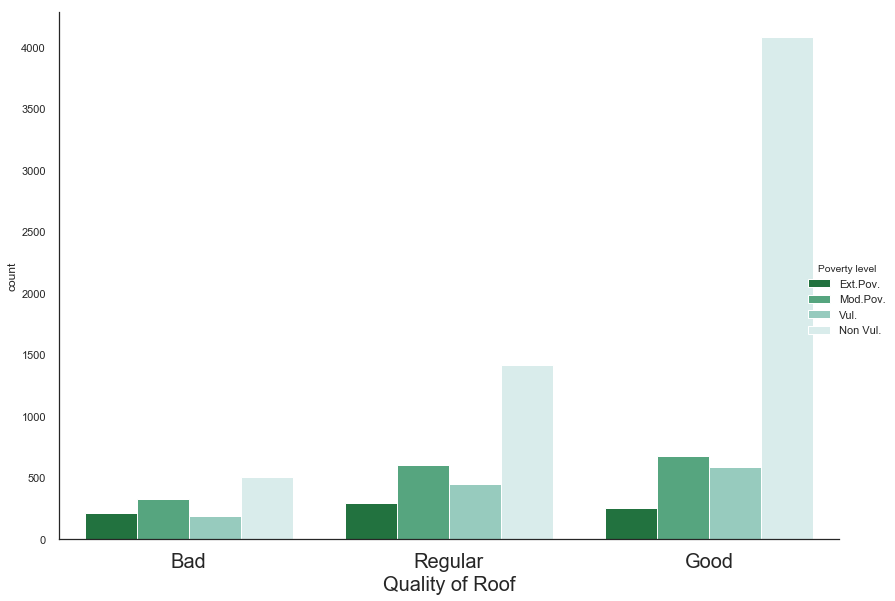

In [1258]:
sns.set_style("white")
ax=sns.catplot(x="techo", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, height=8.27, aspect=11.7/8.27);
ax.set_xlabels('Quality of Roof', fontsize=20)
labels = ['Bad', 'Regular', 'Good']
ax.set_xticklabels(labels, fontsize = 20);
legend = ax._legend
legend.set_title("Poverty level")
for t, l in zip(legend.texts,('Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.')):
    t.set_text(l)

In [1259]:
#Quality of House by Poverty Level
#Techo
piso=[]

# Assign values
for i, row in train.iterrows():
    if row['eviv1'] == 1:
        piso.append(0)
    elif row['eviv2'] == 1:
        piso.append(1)
    elif row['eviv3'] == 1:
        piso.append(2)
    else:
        piso.append(np.nan)
        
# Record the new variable and missing flag
train['piso'] = piso
train['piso'].astype('category', inplace=True)
train['piso'][:5]



0    0
1    1
2    2
3    2
4    2
Name: piso, dtype: int64

In [1260]:
train.piso.value_counts()

2    6175
1    2416
0     966
Name: piso, dtype: int64

In [1261]:
train.eviv3.value_counts()

1    6175
0    3382
Name: eviv3, dtype: int64

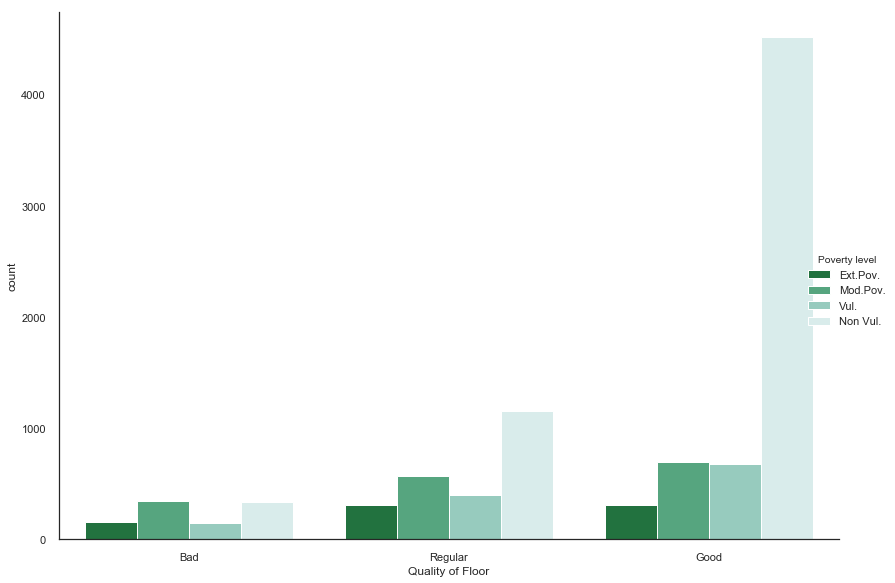

In [1262]:
sns.set_style("white")
ax=sns.catplot(x="piso", hue="Target", kind="count",
            palette="BuGn_r", 
            data=train, height=8.27, aspect=11.7/8.27);
ax.set_xlabels('Quality of Floor')
labels = ['Bad', 'Regular', 'Good']
ax.set_xticklabels(labels);
legend = ax._legend
legend.set_title("Poverty level")
for t, l in zip(legend.texts,('Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.')):
    t.set_text(l)

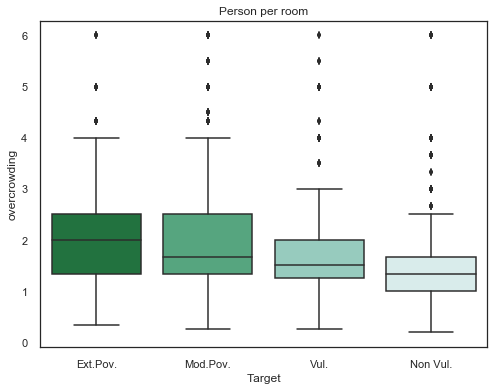

In [1263]:
#Overcrowding
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = train, palette="BuGn_r")
plt.title('Person per room')
plt.xticks(np.arange(0,4), ['Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.'])
plt.show()

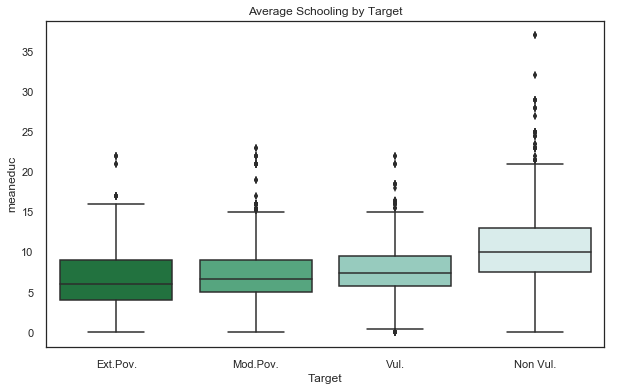

In [1264]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = train, palette="BuGn_r");
plt.xticks(np.arange(0,4), ['Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.'])
plt.title('Average Schooling by Target')
plt.show();

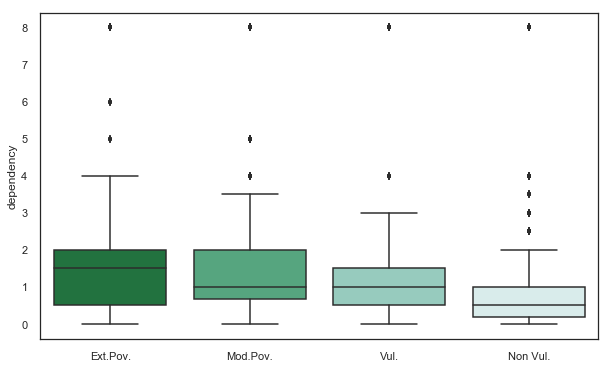

In [1391]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'dependency', data = train, palette="BuGn_r");
plt.xticks(np.arange(0,4), ['Ext.Pov.', 'Mod.Pov.', 'Vul.', 'Non Vul.'])
plt.xlabel('');

In [1266]:
train.drop(['elec','area', 'pared', 'techo', 'piso'], axis=1, inplace=True)

# Modeling

In [1267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [1268]:
#Setting target and features variables
X = train.drop(['Target','Id','idhogar'], axis = 1)
y = train['Target']

In [1269]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7167, 140) (7167,)
(2390, 140) (2390,)


In [1270]:
ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

## Appliying Random Forest to original data

In [1271]:
rf = RandomForestClassifier()
rf.fit(X_trains, y_train)

score_train = rf.score(X_trains, y_train)
score_test = rf.score(X_tests, y_test)

print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))

Random Forest score train: 0.9981861308776336
Random Forest score test: 0.897907949790795


In [1272]:
#Predictions
testx = test.drop(['Id','idhogar'], axis = 1)
testxs = ss.transform(testx)
print(testxs.shape)

predictions = rf.predict(testxs)
score_testxs = rf.score(testxs, predictions)
print(score_testxs)

(23856, 140)
1.0


In [1273]:
#Identify features that matter
importance = rf.feature_importances_
name = np.array(X_train.columns.values.tolist())

X_trains_imp = pd.DataFrame({'feature':name, 'importance':importance})
X_trains_imp = X_trains_imp.sort_values(by='importance', ascending=False)

In [1274]:
X_trains_imp.head(20)

feature  importance
138        SQBmeaned    0.047992
101         meaneduc    0.044902
98        dependency    0.028163
134        SQBedjefe    0.027794
0               v2a1    0.026728
94         hogar_nin    0.024343
112     overcrowding    0.023569
135     SQBhogar_nin    0.022844
121     qmobilephone    0.022269
136  SQBovercrowding    0.021236
137    SQBdependency    0.019778
130              age    0.018922
132           SQBage    0.018740
2              rooms    0.018476
15              r4t2    0.018454
40         cielorazo    0.018436
131      SQBescolari    0.017052
99            edjefe    0.016498
14              r4t1    0.015380
13              r4m3    0.015061

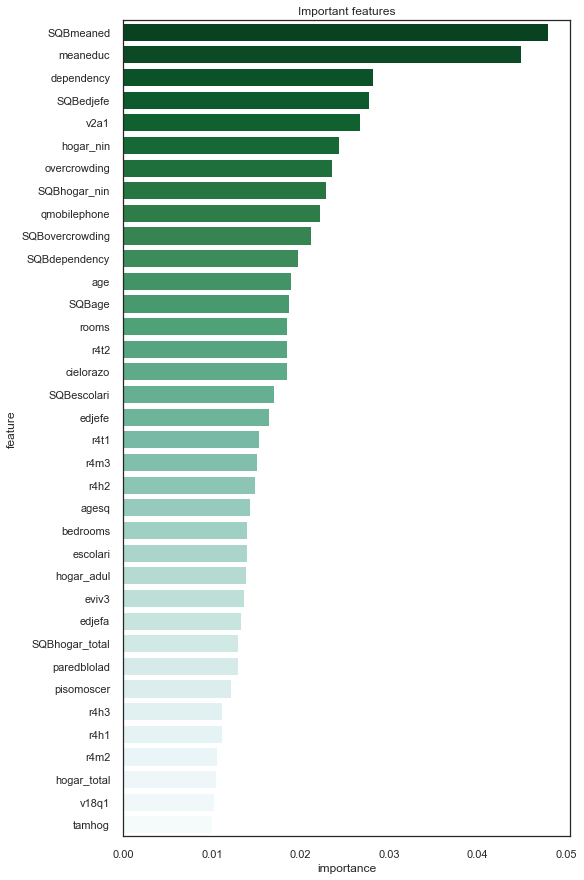

In [1275]:
plt.figure(figsize=(8,15))
sns.barplot(X_trains_imp.loc[(X_trains_imp['importance'] > 0.01),'importance'], y = X_trains_imp.loc[(X_trains_imp['importance'] > 0.01),'feature'], palette="BuGn_r")
plt.title('Important features')
plt.show()

# Feature Engineering

In [1276]:
# Creating new features

# Rent per capita
train['rent_percap'] = train['v2a1'] / train['tamhog']
test['rent_percap'] = test['v2a1'] / test['tamhog']

# Gender (male/female) ratio per household 
train['gender_ratio'] = train['r4h3'] / train['tamhog']
test['gender_ratio'] = test['r4h3'] / test['tamhog']

# Children (under 12 yeas old) percentage per household 
train['child_pc'] = ( train['r4h1'] + train['r4m1'] ) / train['tamhog']
test['child_pc'] = ( test['r4h1'] + test['r4m1'] ) / test['tamhog']

#Youth (between 12 and 19) per household
train['young_pc'] = train['r4t1'] / train['tamhog']
test['young_pc'] = test['r4t1'] / test['tamhog']

# Eldersly (65+) per household 
train['elderly_pc'] = train['hogar_mayor'] / train['tamhog']
test['elderly_pc'] = test['hogar_mayor'] / test['tamhog']

# Ratio children per adult 
train['child_per_adult'] = train['hogar_nin'] / train['hogar_adul']
test['child_per_adult'] = test['hogar_nin'] / test['hogar_adul']

In [1277]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBdependency', 'SQBmeaned', 'agesq', 'Target', 'rent_percap',
       'gender_ratio', 'child_pc', 'young_pc', 'elderly_pc',
       'child_per_adult'],
      dtype='object', length=149)

## Feature Selection 

In [1279]:
#Feature Elimination:  Drop highly correlated variables

#Finding highly correlated features
corr_mat = train.corr()

# Select upper triangle of correlation matrix
upper_corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
features_drop = [column for column in upper_corr.columns if any(abs(upper_corr[column]) > 0.90)]

print(features_drop)

['tamhog', 'tamviv', 'hhsize', 'abastaguafuera', 'coopele', 'sanitario3', 'energcocinar3', 'female', 'hogar_total', 'edjefa', 'area2', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'young_pc']


In [1280]:
train.shape

(9557, 149)

In [1281]:
test.shape

(23856, 148)

## Applying Random Forest on original data + new features engineered

In [1282]:
#Setting target and features variables
X = train.drop(['Target','Id','idhogar'], axis = 1)
y = train['Target']

In [1283]:
#Setting test hold out set equal to X
test1 = test.drop(['Id','idhogar'], axis = 1)

In [1284]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7167, 146) (7167,)
(2390, 146) (2390,)


In [1285]:
np.argwhere(np.isinf(X_train.values))

array([[2148,  145],
       [2743,  145],
       [4479,  145],
       [4722,  145],
       [7111,  145]])

In [1286]:
X_train.columns[145]

'child_per_adult'

In [1287]:
X_train.child_per_adult.median()

0.5

In [1288]:
X_train.iloc[2148, 145] = 0.5
X_train.iloc[2743, 145] = 0.5
X_train.iloc[4479, 145] = 0.5
X_train.iloc[4722, 145] = 0.5
X_train.iloc[7111, 145] = 0.5

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1289]:
X_train.iloc[7111, 145]

0.5

In [1290]:
np.argwhere(np.isinf(X_train.values))

array([], shape=(0, 2), dtype=int64)

In [1291]:
np.any(np.isnan(X_train))

False

In [1292]:
np.argwhere(np.isnan(X_train.values))

array([], shape=(0, 2), dtype=int64)

In [1293]:
np.all(np.isfinite(X_train))

True

In [1294]:
np.where(X_train.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [1295]:
np.argwhere(np.isinf(test1.values))

array([[    4,   145],
       [  535,   145],
       [  536,   145],
       [  537,   145],
       [ 2612,   145],
       [ 2613,   145],
       [ 6809,   145],
       [ 6810,   145],
       [ 7266,   145],
       [ 7267,   145],
       [15808,   145],
       [15809,   145],
       [15810,   145],
       [16096,   145],
       [16097,   145],
       [16291,   145],
       [19421,   145],
       [19985,   145],
       [21136,   145],
       [21137,   145],
       [21644,   145],
       [21645,   145],
       [21824,   145],
       [21825,   145],
       [21826,   145],
       [21827,   145],
       [22125,   145],
       [22126,   145],
       [22336,   145],
       [22337,   145],
       [22338,   145]])

In [1296]:
test1.columns[145]

'child_per_adult'

In [1297]:
test1.child_per_adult.median()

0.5

In [1298]:
test1.iloc[4, 145] = 0.5
test1.iloc[535, 145] = 0.5
test1.iloc[536, 145] = 0.5
test1.iloc[537, 145] = 0.5
test1.iloc[2612, 145] = 0.5
test1.iloc[2613, 145] = 0.5
test1.iloc[6809, 145] = 0.5
test1.iloc[6810, 145] = 0.5
test1.iloc[7266, 145] = 0.5
test1.iloc[7267, 145] = 0.5
test1.iloc[15808, 145] = 0.5
test1.iloc[15809, 145] = 0.5
test1.iloc[15810, 145] = 0.5
test1.iloc[16096, 145] = 0.5
test1.iloc[16097, 145] = 0.5
test1.iloc[16291, 145] = 0.5
test1.iloc[19421, 145] = 0.5
test1.iloc[19985, 145] = 0.5
test1.iloc[21136, 145] = 0.5
test1.iloc[21137, 145] = 0.5
test1.iloc[21644, 145] = 0.5
test1.iloc[21645, 145] = 0.5
test1.iloc[21824, 145] = 0.5
test1.iloc[21825, 145] = 0.5
test1.iloc[21826, 145] = 0.5
test1.iloc[21827, 145] = 0.5
test1.iloc[22125, 145] = 0.5
test1.iloc[22126, 145] = 0.5
test1.iloc[22336, 145] = 0.5
test1.iloc[22337, 145] = 0.5
test1.iloc[22338, 145] = 0.5


In [1299]:
np.argwhere(np.isinf(test1.values))

array([], shape=(0, 2), dtype=int64)

In [1300]:
test1.iloc[22338, 145]

0.5

In [1301]:
np.argwhere(np.isinf(test1.values))

array([], shape=(0, 2), dtype=int64)

In [1302]:
np.any(np.isnan(test1))

False

In [1303]:
np.argwhere(np.isnan(test1.values))

array([], shape=(0, 2), dtype=int64)

In [1304]:
np.all(np.isfinite(test1))

True

In [1305]:
np.where(test1.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [1306]:
ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [1307]:
rf = RandomForestClassifier()
rf.fit(X_trains, y_train)

score_train = rf.score(X_trains, y_train)
score_test = rf.score(X_tests, y_test)

print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))

Random Forest score train: 0.9987442444537463
Random Forest score test: 0.9192468619246862


In [1308]:
#Predictions
test1s = ss.transform(test1)
print(test1s.shape)

(23856, 146)


In [1309]:
#Identify features that matter
importance = rf.feature_importances_
name = np.array(X_train.columns.values.tolist())

X_trains_imp = pd.DataFrame({'feature':name, 'importance':importance})
X_trains_imp = X_trains_imp.sort_values(by='importance', ascending=False)

In [1310]:
X_trains_imp.head(20)

feature  importance
138        SQBmeaned    0.055493
101         meaneduc    0.052658
145  child_per_adult    0.033188
121     qmobilephone    0.024622
140      rent_percap    0.024088
94         hogar_nin    0.023245
136  SQBovercrowding    0.022697
0               v2a1    0.022602
98        dependency    0.022283
134        SQBedjefe    0.020005
112     overcrowding    0.019469
137    SQBdependency    0.017883
141     gender_ratio    0.017048
2              rooms    0.016075
132           SQBage    0.015838
131      SQBescolari    0.015668
130              age    0.014884
139            agesq    0.014795
10              r4h3    0.014775
9               r4h2    0.013905

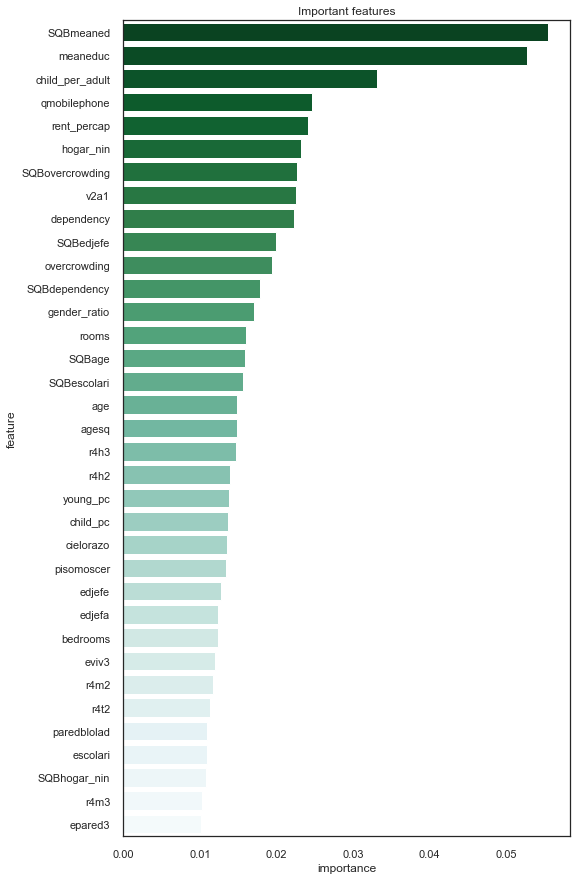

In [1311]:
plt.figure(figsize=(8,15))
sns.barplot(X_trains_imp.loc[(X_trains_imp['importance'] > 0.01),'importance'], y = X_trains_imp.loc[(X_trains_imp['importance'] > 0.01),'feature'], palette="BuGn_r")
plt.title('Important features')
plt.show()

## Random Forest removing High Correlated Data

In [ ]:
#mi eliminacion
'SQBmeaned','hhsize', 'hogar_total', 'SQBage', 'SQBhogar_total', 'agesq', 'young_pc'

In [ ]:
0.95
['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'edjefa', 'area2', 'SQBage', 'SQBhogar_total', 'agesq', 'young_pc']

In [ ]:
#0.90
'tamhog', 'tamviv', 'hhsize', 'abastaguafuera', 'coopele', 'sanitario3', 'energcocinar3', 'female', 'hogar_total', 'edjefa', 'area2', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'young_pc'

In [885]:
# mi eliminacion Removing high correlated features from train and test para score 0.93
trainre = train.drop(['SQBmeaned','hhsize', 'hogar_total', 'SQBage', 'SQBhogar_total', 'agesq', 'young_pc'], axis=1)
testre = test.drop(['SQBmeaned','hhsize', 'hogar_total', 'SQBage', 'SQBhogar_total', 'agesq', 'young_pc'], axis=1)

In [ ]:
#0.95 Removing high correlated features from train and test todas las correlated score 0.93
trainre = train.drop(['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'edjefa', 'area2', 'SQBage', 'SQBhogar_total', 'agesq', 'young_pc'], axis=1)
testre = test.drop(['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'edjefa', 'area2', 'SQBage', 'SQBhogar_total', 'agesq', 'young_pc'], axis=1)

In [1312]:
# 0.90 Removing high correlated features from train and test todas las correlated score 0.93
trainre = train.drop(['tamhog', 'tamviv', 'hhsize', 'abastaguafuera', 'coopele', 'sanitario3', 'energcocinar3', 'female', 'hogar_total', 'edjefa', 'area2', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'young_pc'], axis=1)
testre = test.drop(['tamhog', 'tamviv', 'hhsize', 'abastaguafuera', 'coopele', 'sanitario3', 'energcocinar3', 'female', 'hogar_total', 'edjefa', 'area2', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'young_pc'], axis=1)

In [1313]:
#Setting target and features variables
X = trainre.drop(['Target','Id','idhogar'], axis = 1)
y = trainre['Target']
testre = testre.drop(['Id','idhogar'], axis=1)

In [1314]:
testre.shape

(23856, 127)

In [1315]:
X.shape

(9557, 127)

In [1316]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7167, 127) (7167,)
(2390, 127) (2390,)


In [1317]:
np.argwhere(np.isinf(X_train.values))

array([[2148,  126],
       [2743,  126],
       [4479,  126],
       [4722,  126],
       [7111,  126]])

In [1318]:
X_train.columns[126]

'child_per_adult'

In [1319]:
X_train.child_per_adult.median()

0.5

In [1320]:
X_train.iloc[2148, 126] = 0.5
X_train.iloc[2743, 126] = 0.5
X_train.iloc[4479, 126] = 0.5
X_train.iloc[4722, 126] = 0.5
X_train.iloc[7111, 126] = 0.5

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1321]:
X_train.iloc[7111, 126]

0.5

In [1322]:
np.argwhere(np.isinf(X_train.values))

array([], shape=(0, 2), dtype=int64)

In [1323]:
np.any(np.isnan(X_train))

False

In [1324]:
np.argwhere(np.isnan(X_train.values))

array([], shape=(0, 2), dtype=int64)

In [1325]:
np.all(np.isfinite(X_train))

True

In [1326]:
np.where(X_train.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [1327]:
np.argwhere(np.isinf(testre.values))

array([[    4,   126],
       [  535,   126],
       [  536,   126],
       [  537,   126],
       [ 2612,   126],
       [ 2613,   126],
       [ 6809,   126],
       [ 6810,   126],
       [ 7266,   126],
       [ 7267,   126],
       [15808,   126],
       [15809,   126],
       [15810,   126],
       [16096,   126],
       [16097,   126],
       [16291,   126],
       [19421,   126],
       [19985,   126],
       [21136,   126],
       [21137,   126],
       [21644,   126],
       [21645,   126],
       [21824,   126],
       [21825,   126],
       [21826,   126],
       [21827,   126],
       [22125,   126],
       [22126,   126],
       [22336,   126],
       [22337,   126],
       [22338,   126]])

In [1328]:
testre.columns[126]

'child_per_adult'

In [1329]:
testre.child_per_adult.median()

0.5

In [1330]:
testre.iloc[4, 126] = 0.5
testre.iloc[535, 126] = 0.5
testre.iloc[536, 126] = 0.5
testre.iloc[537, 126] = 0.5
testre.iloc[2612, 126] = 0.5
testre.iloc[2613, 126] = 0.5
testre.iloc[6809, 126] = 0.5
testre.iloc[6810, 126] = 0.5
testre.iloc[7266, 126] = 0.5
testre.iloc[7267, 126] = 0.5
testre.iloc[15808, 126] = 0.5
testre.iloc[15809, 126] = 0.5
testre.iloc[15810, 126] = 0.5
testre.iloc[16096, 126] = 0.5
testre.iloc[16097, 126] = 0.5
testre.iloc[16291, 126] = 0.5
testre.iloc[19421, 126] = 0.5
testre.iloc[19985, 126] = 0.5
testre.iloc[21136, 126] = 0.5
testre.iloc[21137, 126] = 0.5
testre.iloc[21644, 126] = 0.5
testre.iloc[21645, 126] = 0.5
testre.iloc[21824, 126] = 0.5
testre.iloc[21825, 126] = 0.5
testre.iloc[21826, 126] = 0.5
testre.iloc[21827, 126] = 0.5
testre.iloc[22125, 126] = 0.5
testre.iloc[22126, 126] = 0.5
testre.iloc[22336, 126] = 0.5
testre.iloc[22337, 126] = 0.5
testre.iloc[22338, 126] = 0.5


In [1331]:
np.argwhere(np.isinf(test1.values))

array([], shape=(0, 2), dtype=int64)

In [1332]:
testre.iloc[22338, 126]

0.5

In [1333]:
np.argwhere(np.isinf(test1.values))

array([], shape=(0, 2), dtype=int64)

In [1334]:
np.any(np.isnan(test1))

False

In [1335]:
np.argwhere(np.isnan(test1.values))

array([], shape=(0, 2), dtype=int64)

In [1336]:
np.all(np.isfinite(test1))

True

In [1337]:
np.where(test1.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [1338]:
ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [1339]:
testre1 = ss.transform(testre)
print(testre1.shape)

(23856, 127)


In [1340]:
rf = RandomForestClassifier()
rf.fit(X_trains, y_train)

score_train = rf.score(X_trains, y_train)
score_test = rf.score(X_tests, y_test)

print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))


Random Forest score train: 0.9983256592716618
Random Forest score test: 0.9221757322175732


## Gridsearch for this Random Fores

In [1341]:
from sklearn.model_selection import GridSearchCV

In [1342]:
%%time

rf_params = {
    'n_estimators':[25, 35, 45, 50, 60],
    'max_depth':[20, 50, 100],
    'min_samples_split': [2, 3]}


rf_gridsearch = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=2)

rf_gridsearch = rf_gridsearch.fit(X_trains, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.1s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:   37.3s finished


CPU times: user 3 s, sys: 168 ms, total: 3.17 s
Wall time: 38.1 s


In [1343]:
rf_gridsearch.best_score_

0.9101437142458491

In [1344]:
rf_gridsearch.best_params_

{'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 60}

In [1345]:
best_rf = rf_gridsearch.best_estimator_
best_rf.score(X_tests, y_test)

0.9343096234309624

In [1346]:
print('baseline:', np.mean(y_test))
print('default rf:', rf.score(X_tests, y_test))

baseline: 3.302510460251046
default rf: 0.9221757322175732


In [1347]:
rf = RandomForestClassifier(n_estimators=60, 
                            max_depth = 50,
                            min_samples_split =2)
rf.fit(X_trains, y_train)

score_train = rf.score(X_trains, y_train)
score_test = rf.score(X_tests, y_test)

print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))

Random Forest score train: 1.0
Random Forest score test: 0.9368200836820084


In [1348]:
y_hat = rf.predict(X_tests)

In [1362]:
y_hat_pd = pd.DataFrame({'pred':y_hat})

In [1363]:
y_hat_pd.columns

Index(['pred'], dtype='object')

In [1365]:
y_hat_pd.pred.value_counts()

4    1601
2     371
3     256
1     162
Name: pred, dtype: int64

In [1373]:
y_test_pd = pd.DataFrame({'y_test':y_test})
y_test_pd.y_test.value_counts()

4    1500
2     399
3     302
1     189
Name: y_test, dtype: int64

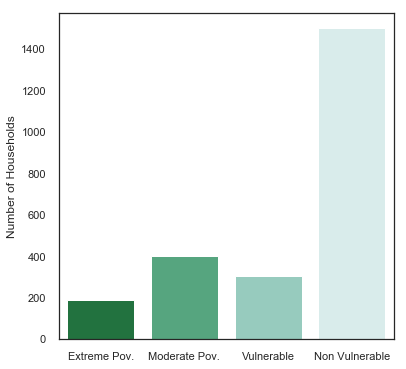

In [1374]:
#Valores originales y_test
sns.set(font_scale=1, rc={'figure.figsize':(6, 6)}, palette="BuGn_r")
sns.set_style("white")
ax=sns.countplot(x='y_test', data=y_test_pd, palette="BuGn_r")
plt.xticks(rotation=0)
labels = ['Extreme Pov.', 'Moderate Pov.', 'Vulnerable', 'Non Vulnerable']
ax.set_xticklabels(labels)
plt.ylabel('Number of Households')
plt.xlabel("")
plt.show()

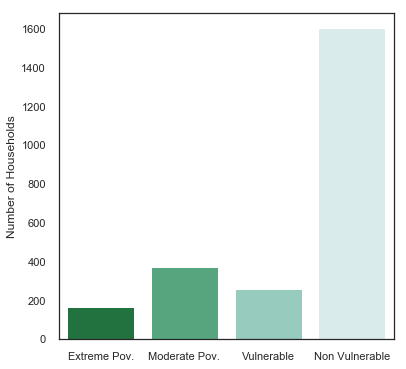

In [1371]:
#Predicciones
sns.set(font_scale=1, rc={'figure.figsize':(6, 6)}, palette="BuGn_r")
sns.set_style("white")
ax=sns.countplot(x='pred', data=y_hat_pd, palette="BuGn_r")
plt.xticks(rotation=0)
labels = ['Extreme Pov.', 'Moderate Pov.', 'Vulnerable', 'Non Vulnerable']
ax.set_xticklabels(labels)
plt.ylabel('Number of Households')
plt.xlabel("")
plt.show()

In [1367]:
from sklearn.metrics import classification_report

In [1370]:
print(classification_report(y_test, y_hat))

             precision    recall  f1-score   support

          1       0.96      0.82      0.88       189
          2       0.93      0.86      0.89       399
          3       0.96      0.81      0.88       302
          4       0.93      1.00      0.96      1500

avg / total       0.94      0.94      0.94      2390



In [1012]:
#Identify features that matter
importance = rf.feature_importances_
name = np.array(X_train.columns.values.tolist())

X_trains_imp = pd.DataFrame({'feature':name, 'importance':importance})
X_trains_imp = X_trains_imp.sort_values(by='importance', ascending=False)

In [1013]:
X_trains_imp.head(20)

feature  importance
91          meaneduc    0.069764
89        dependency    0.034010
102     overcrowding    0.030741
126  child_per_adult    0.029338
0               v2a1    0.029202
120        SQBedjefe    0.029084
122      rent_percap    0.027264
111     qmobilephone    0.026536
17          escolari    0.023791
119              age    0.022841
121     SQBhogar_nin    0.022544
2              rooms    0.022020
123     gender_ratio    0.022005
86         hogar_nin    0.021974
124         child_pc    0.019997
90            edjefe    0.018923
16              r4t3    0.017756
15              r4t2    0.017686
9               r4h2    0.017289
10              r4h3    0.017217

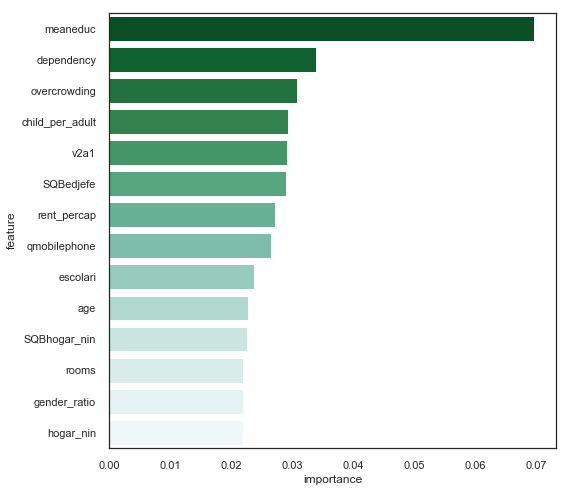

In [1103]:
plt.figure(figsize=(8, 8))
sns.barplot(X_trains_imp.loc[(X_trains_imp['importance'] > 0.02),'importance'], y = X_trains_imp.loc[(X_trains_imp['importance'] > 0.02),'feature'], palette="BuGn_r")
#plt.title('Important features')
plt.show()

In [1397]:
# Submission
preds_rf = rf.predict(testre1)

In [1398]:
preds_rf = pd.DataFrame({'Id':test.index, 'Target':preds_rf})

#preds_RF.to_csv
preds_rf.to_csv('preds_rf.csv', index=False)

## Extra Tree Classifier

In [856]:
from sklearn.tree import ExtraTreeClassifier

In [857]:
et = ExtraTreeClassifier()

et.fit(X_trains, y_train)

score_train = et.score(X_trains, y_train)
score_test = et.score(X_tests, y_test)

print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))


Random Forest score train: 1.0
Random Forest score test: 0.8506276150627615


## Adaboost

In [858]:
from sklearn.ensemble import AdaBoostClassifier

In [859]:
ada = AdaBoostClassifier()

ada.fit(X_trains, y_train)

score_train = ada.score(X_trains, y_train)
score_test = ada.score(X_tests, y_test)

print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))


Random Forest score train: 0.7029440491139947
Random Forest score test: 0.6878661087866109


## Gradient Booster

In [860]:
from sklearn.ensemble import GradientBoostingClassifier

In [861]:
gb = GradientBoostingClassifier()

gb.fit(X_trains, y_train)

score_train = gb.score(X_trains, y_train)
score_test = gb.score(X_tests, y_test)

print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))


Random Forest score train: 0.8124738384261198
Random Forest score test: 0.7841004184100419


# Feature Extraction - PCA

In [810]:
#Feature Extraction: PCA f

#Import PCA
from sklearn.decomposition import PCA

In [811]:
#Instantiate PCA
pca = PCA()

#Fit PCA . 
pca = pca.fit(X_trains) #y_train?) #Only include X because this is unsupervised model, no y_train


In [812]:
Z_train = pca.transform(X_trains)
Z_train

array([[ 2.17789507e+00, -4.23196781e+00, -1.55509297e+00, ...,
         7.37043337e-16, -3.62025513e-17, -3.18313464e-16],
       [-5.11449937e-01, -1.20944423e+00,  6.71571545e-01, ...,
        -8.70006853e-16, -4.47171925e-16,  9.22618936e-16],
       [ 3.87341276e+00,  2.74229658e-01, -1.21999539e-01, ...,
        -4.27590941e-16,  1.03972389e-15,  1.04609757e-15],
       ...,
       [ 6.60913981e-02,  7.96748184e-01,  3.85247986e+00, ...,
        -2.58502128e-16,  1.00704406e-15,  1.53010433e-16],
       [ 2.07684117e+00,  2.01182753e+00,  2.59287119e+00, ...,
        -1.78937218e-15, -7.74555291e-16,  1.55494265e-15],
       [ 1.39948794e+00, -4.26978371e-01, -2.07143103e+00, ...,
         2.22044605e-16,  1.99244177e-15, -2.50382035e-15]])

In [813]:
Z_test = pca.transform(X_tests)
Z_test

array([[ 3.35276242e+00, -2.19754476e+00, -2.33608355e+00, ...,
        -9.17392720e-16, -4.02542786e-16,  8.03519633e-17],
       [-4.58519950e-01,  2.06595055e+00, -4.10771056e-01, ...,
         4.48075181e-16,  2.26776879e-17,  4.31137021e-16],
       [-2.47165815e+00,  1.53468090e+00,  2.69571311e+00, ...,
         9.12243846e-16, -3.89178169e-18, -6.32908000e-16],
       ...,
       [-1.71210296e+00, -1.31657398e+00,  3.72819106e+00, ...,
         5.79744213e-16, -6.71350951e-17,  2.18638236e-16],
       [-4.01674563e+00,  6.44972753e-01,  1.13426845e+00, ...,
        -1.27957510e-16, -1.96250437e-15, -3.09133050e-16],
       [-2.10623287e+00, -5.40175844e-01,  7.08845535e-01, ...,
        -1.11022302e-15, -1.40176550e-15,  2.67373247e-16]])

In [814]:
#X_trains = pd.DataFrame(X_train)

Z_train = pd.DataFrame(Z_train)

Z_test = pd.DataFrame(Z_test)

In [815]:
X_trains.shape

(7167, 140)

In [816]:
Z_test.shape

(2390, 140)

In [817]:
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)


cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [8.46314253e-02 6.43932772e-02 4.13750113e-02 3.07968723e-02
 2.86079785e-02 2.63363158e-02 2.36981411e-02 2.18250485e-02
 2.05442552e-02 1.79030002e-02 1.70512447e-02 1.64157894e-02
 1.51514830e-02 1.48726332e-02 1.42685866e-02 1.41282803e-02
 1.30783784e-02 1.22175224e-02 1.20173353e-02 1.15993248e-02
 1.12707889e-02 1.10966220e-02 1.05065109e-02 1.01747418e-02
 1.00052820e-02 9.92039273e-03 9.37171013e-03 9.11271918e-03
 9.03756255e-03 8.90727460e-03 8.84390172e-03 8.70738396e-03
 8.62064650e-03 8.43272352e-03 8.29211269e-03 8.23764822e-03
 8.16799564e-03 8.08641418e-03 7.97405444e-03 7.86829543e-03
 7.79617893e-03 7.66870862e-03 7.59847052e-03 7.51718518e-03
 7.47356437e-03 7.38783597e-03 7.37834257e-03 7.30109067e-03
 7.25547971e-03 7.19925790e-03 7.13663154e-03 7.08007006e-03
 7.02391823e-03 6.97954247e-03 6.91615716e-03 6.89196582e-03
 6.81677856e-03 6.64460489e-03 6.62905039e-03 6.55846671e-03
 6.45719829e-03 6.41432809e-03 6.34637968e-03 6.33677

Based on the cumulative explained variance:
- The first 72 features explain 0.9031% of variability on data
- The first 96 features explain 0.9592% of variability on data

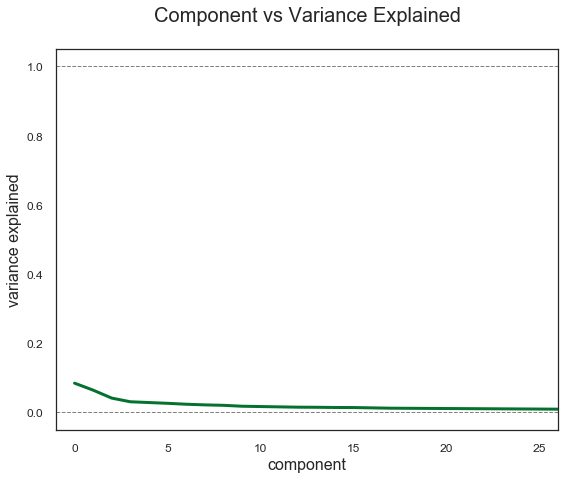

In [818]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(var_exp))
plt.plot(component_number, var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

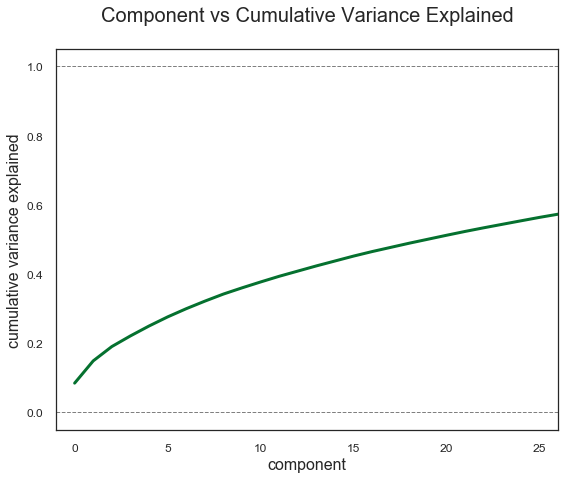

In [819]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)

plt.show()

## Random Forest with PCA

In [1091]:
rf = RandomForestClassifier()

In [1092]:
from sklearn.model_selection import cross_val_score

In [1093]:
cross_val_score(rf, Z_train, y_train).mean()

0.7125732403430473

In [1095]:

rf.fit(Z_train, y_train)

score_train = rf.score(Z_train, y_train)
score_test = rf.score(Z_test, y_test)

In [1096]:
print(score_train)

0.9941398074508162


In [1097]:
print(score_test)

0.7489539748953975
